In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

In [2]:
url = "https://accident.laboneko.jp/date/2018?page=1"
res = requests.get("https://accident.laboneko.jp/date/2018?page=1")
res.text

'<!DOCTYPE html>\n<html>\n    <head>\n        <meta name="viewport" content="width=device-width, initial-scale=1">\n        <title>2018年の鉄道人身事故一覧 | 鉄道人身事故データベース</title>\n        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css">\n        <meta name="keywords" content="人身事故,ランキング,電車,鉄道,鉄道人身事故,一覧,情報,駅,路線,鉄道会社,2018年">\n        <meta name="description" content="2018年の鉄道人身事故情報一覧">\n        <meta name="twitter:card" content="summary"/>\n        <meta name="twitter:site" content="@accident_train"/>\n        <meta property="og:url" content="https://accident.laboneko.jp"/>\n        <meta property="og:title" content="鉄道人身事故データベース"/>\n        <meta property="og:description" content="2018年の鉄道人身事故情報一覧"/>\n        <meta property="og:image" content="https://accident.laboneko.jp/logo.png"/>\n        <style>\n            body {\n              padding-top: 70px;\n              padding-bottom: 30px;\n            }\n\n            .theme-dropdown .dropdown-

In [3]:
data = BeautifulSoup(res.text)

/Users/AsheLiao/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/AsheLiao/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:
data

<!DOCTYPE html>
<html>
<head>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>2018年の鉄道人身事故一覧 | 鉄道人身事故データベース</title>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet"/>
<meta content="人身事故,ランキング,電車,鉄道,鉄道人身事故,一覧,情報,駅,路線,鉄道会社,2018年" name="keywords"/>
<meta content="2018年の鉄道人身事故情報一覧" name="description"/>
<meta content="summary" name="twitter:card"/>
<meta content="@accident_train" name="twitter:site"/>
<meta content="https://accident.laboneko.jp" property="og:url"/>
<meta content="鉄道人身事故データベース" property="og:title"/>
<meta content="2018年の鉄道人身事故情報一覧" property="og:description"/>
<meta content="https://accident.laboneko.jp/logo.png" property="og:image"/>
<style>
            body {
              padding-top: 70px;
              padding-bottom: 30px;
            }

            .theme-dropdown .dropdown-menu {
              position: static;
              display: block;
              margin-bottom: 20px;
            }

In [5]:
df = pd.read_html(data.prettify())

In [6]:
df = df[0]

In [7]:
df.columns = ['Time', 'Route', 'Location', 'Person', 'Details']

In [8]:
del df['Details']

In [9]:
df

,Time,Route,Location,Person
0,18/12/07 07:24,東北本線,陸前山王駅,NaN
1,18/12/07 05:21,中央快速線,三鷹駅,NaN
2,18/12/07 00:15,JR宝塚線,新三田駅,NaN
3,18/12/06 21:29,南武線,稲田堤駅,男性 / 30代 / 死亡
4,18/12/06 19:06,篠ノ井線,川中島駅,NaN
5,18/12/06 18:11,中央本線,土岐市駅,NaN
6,18/12/06 17:36,東武スカイツリーライン,北越谷駅〜大袋駅,NaN
7,18/12/06 12:42,学研都市線,大住駅〜松井山手駅,NaN
8,18/12/05 17:02,南海本線,七道駅,女性 / 10代 / 死亡
9,18/12/05 15:39,近鉄大阪線,松塚駅〜真菅駅,女性 / 70代 / 死亡


In [10]:
for i in range(2, 103):
    url = "https://accident.laboneko.jp/date/2018?page=" + str(i)
    #print(url)
    res = requests.get(url)
    data = BeautifulSoup(res.text)
    df2 = pd.read_html(data.prettify())[0]
    df2.columns = ['Time', 'Route', 'Location', 'Person', 'Details']
    del df2['Details']
    df = pd.concat([df, df2])

/Users/AsheLiao/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/AsheLiao/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [11]:
df.index = df['Time']

In [12]:
df['Hour'] = df.Time.str.slice(-5, -3).astype(int)

In [13]:
df['Day'] = df.Time.str.slice(6, 9).astype(int)

In [14]:
df['Month'] = df.Time.str.slice(3, 5).astype(int)

In [15]:
df['Year'] = 2018

In [16]:
del df['Time']

In [17]:
df

,Route,Location,Person,Hour,Day,Month,Year
Time,,,,,,,
18/12/07 07:24,東北本線,陸前山王駅,NaN,7,7,12,2018
18/12/07 05:21,中央快速線,三鷹駅,NaN,5,7,12,2018
18/12/07 00:15,JR宝塚線,新三田駅,NaN,0,7,12,2018
18/12/06 21:29,南武線,稲田堤駅,男性 / 30代 / 死亡,21,6,12,2018
18/12/06 19:06,篠ノ井線,川中島駅,NaN,19,6,12,2018
18/12/06 18:11,中央本線,土岐市駅,NaN,18,6,12,2018
18/12/06 17:36,東武スカイツリーライン,北越谷駅〜大袋駅,NaN,17,6,12,2018
18/12/06 12:42,学研都市線,大住駅〜松井山手駅,NaN,12,6,12,2018
18/12/05 17:02,南海本線,七道駅,女性 / 10代 / 死亡,17,5,12,2018


In [18]:
df['Gender'] = df['Person'].str.slice(0,2)

In [19]:
df['Situation'] = df['Person'].str.slice(-3, )

In [20]:
df.Gender[df.Gender == '男性'] = 1
df.Gender[df.Gender == '女性'] = 0

/Users/AsheLiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/AsheLiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df 

,Route,Location,Person,Hour,Day,Month,Year,Gender,Situation
Time,,,,,,,,,
18/12/07 07:24,東北本線,陸前山王駅,NaN,7,7,12,2018,NaN,NaN
18/12/07 05:21,中央快速線,三鷹駅,NaN,5,7,12,2018,NaN,NaN
18/12/07 00:15,JR宝塚線,新三田駅,NaN,0,7,12,2018,NaN,NaN
18/12/06 21:29,南武線,稲田堤駅,男性 / 30代 / 死亡,21,6,12,2018,1,死亡
18/12/06 19:06,篠ノ井線,川中島駅,NaN,19,6,12,2018,NaN,NaN
18/12/06 18:11,中央本線,土岐市駅,NaN,18,6,12,2018,NaN,NaN
18/12/06 17:36,東武スカイツリーライン,北越谷駅〜大袋駅,NaN,17,6,12,2018,NaN,NaN
18/12/06 12:42,学研都市線,大住駅〜松井山手駅,NaN,12,6,12,2018,NaN,NaN
18/12/05 17:02,南海本線,七道駅,女性 / 10代 / 死亡,17,5,12,2018,0,死亡


In [24]:
df.to_csv('JapanRailwayAccidentRaw.csv')

In [25]:
df['Route'].value_counts()

東海道線            40
中央快速線           32
宇都宮線            29
東武東上線           27
西武池袋線           19
山陽本線            19
東武伊勢崎線          18
常磐線             18
鹿児島本線           17
日豊本線            17
京浜東北線           16
JR神戸線           16
予讃線             15
京急本線            15
小田急小田原線         15
高崎線             14
阪急京都本線          13
西武新宿線           13
京成本線            13
相鉄本線            13
京阪本線            12
中央・総武緩行線        12
東北本線            11
中央本線            11
近鉄名古屋線          11
京王線             11
南海本線            10
近鉄大阪線           10
横須賀線             9
東武アーバンパークライン     9
                ..
牟岐線              1
根室本線             1
富士急行線            1
名古屋市営地下鉄名城線      1
福塩線              1
東武日光線            1
日南線              1
青い森鉄道線           1
JR東西線            1
京急逗子線            1
江ノ島電鉄線           1
宇部線              1
西鉄貝塚線            1
五日市線             1
身延線              1
日田彦山線            1
近鉄湯の山線           1
名鉄尾西線            1
大阪メトロ四つ橋線        1
京急大師線            1
阿武隈急行線           1
長野電鉄長野線     

In [ ]:
df['Location'].value_counts()

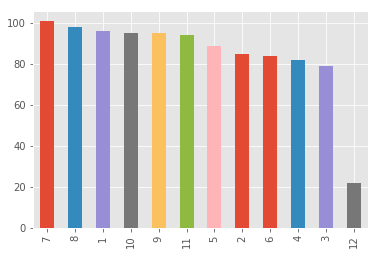

In [43]:
df['Month'].value_counts().plot('bar')

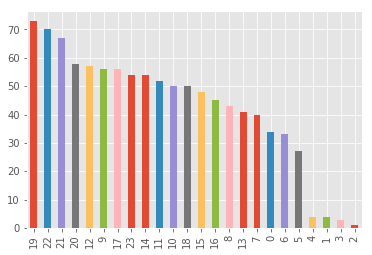

In [41]:
df['Hour'].value_counts().plot('bar')

In [46]:
df['Gender'].value_counts()

1     439
0     244
死亡     19
無傷     13
不明      4
10      1
40      1
Name: Gender, dtype: int64

In [28]:
import matplotlib as plt
% matplotlib inline

In [31]:
plt.style.use('ggplot')

In [47]:
439/244

1.7991803278688525